In [18]:
import pandas as pd

df = pd.read_csv('/Users/alessiaperrone/Documents/shopping_trends_analysis_project/shopping_trends_analysis/data/shopping_trends.csv')

In [19]:
import pandas as pd  # Importa pandas per la manipolazione e l'analisi dei dati
import matplotlib.pyplot as plt  # Importa matplotlib per la visualizzazione dei dati
import seaborn as sns  # Importa seaborn per visualizzare e analizzare i dati in modo più elegante
from sklearn.model_selection import train_test_split  # Importa train_test_split per dividere i dati in set di addestramento e test
from sklearn.linear_model import LinearRegression  # Importa LinearRegression per creare modelli di regressione
from sklearn.cluster import KMeans  # Importa KMeans per eseguire clustering
from sklearn.metrics import mean_squared_error, r2_score  # Importa metriche di valutazione per modelli

In [20]:
# Visualizzare le prime righe
print(df.head())

# Informazioni sui dati
print(df.info())

# Statistiche descrittive
print(df.describe())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

<Figure size 1200x600 with 0 Axes>

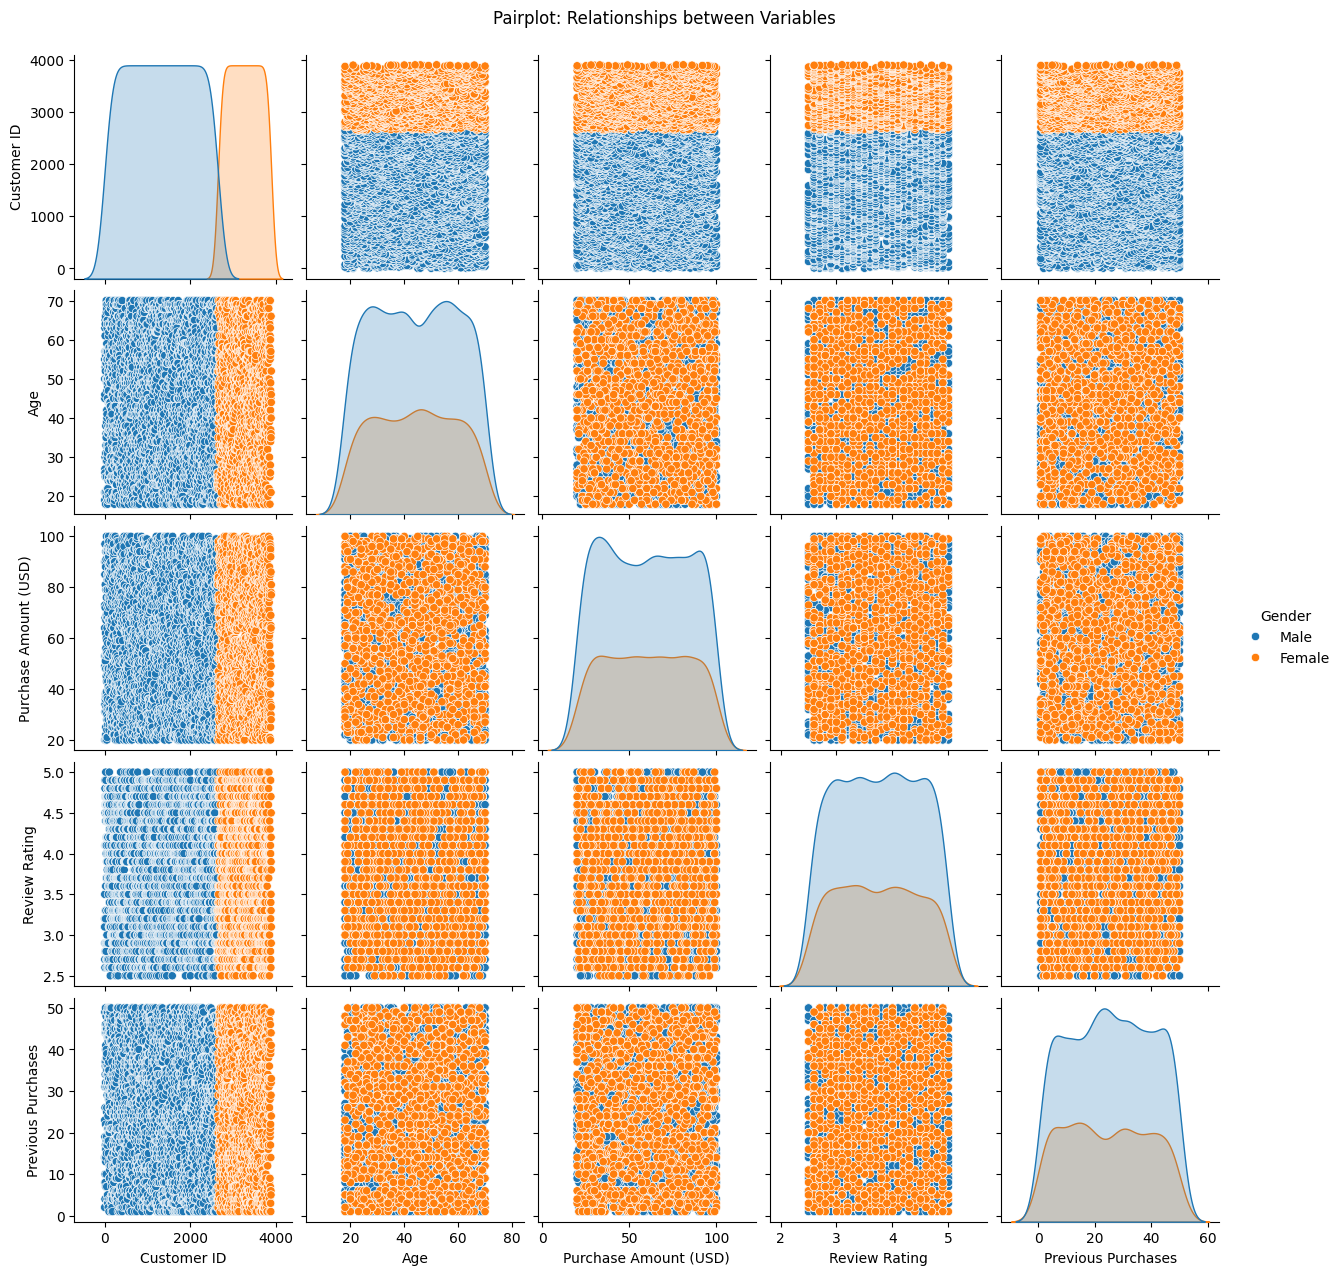

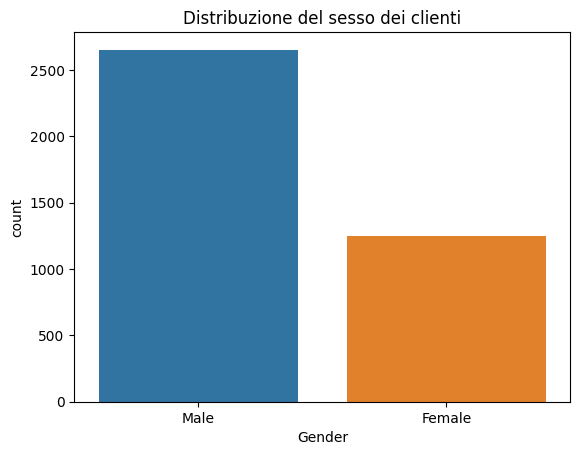

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Età
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='Gender', diag_kind='kde')
plt.suptitle('Pairplot: Relationships between Variables', y=1.02)
plt.show()

# Sesso
sns.countplot(data=df, x='Gender', hue='Gender')
plt.title('Distribuzione del sesso dei clienti')
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_5720/1485094869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_counts.index, y=loc_counts.values, palette='viridis')


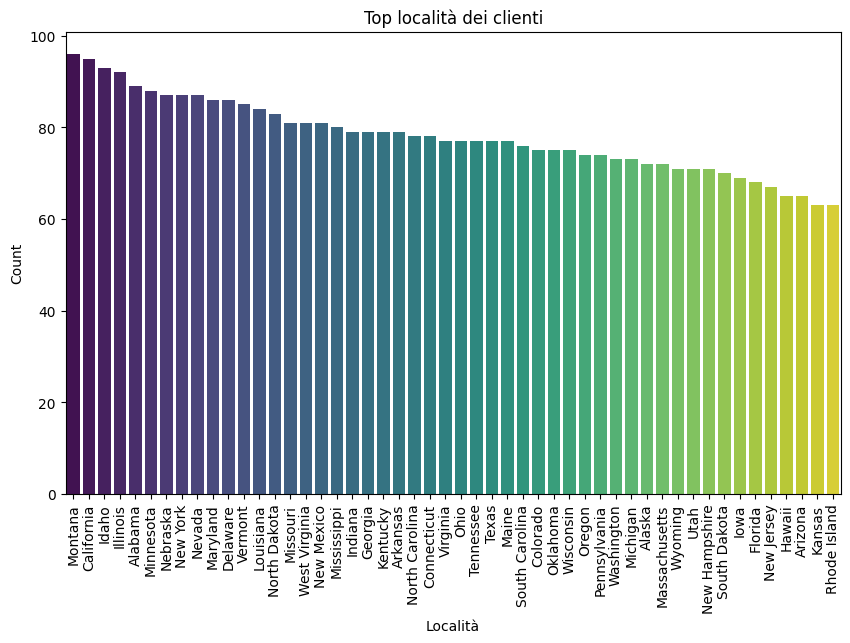

In [25]:
loc_counts = df['Location'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=loc_counts.index, y=loc_counts.values, palette='viridis')
plt.title('Top località dei clienti')
plt.xlabel('Località')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x se necessario
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_5720/1953881055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')


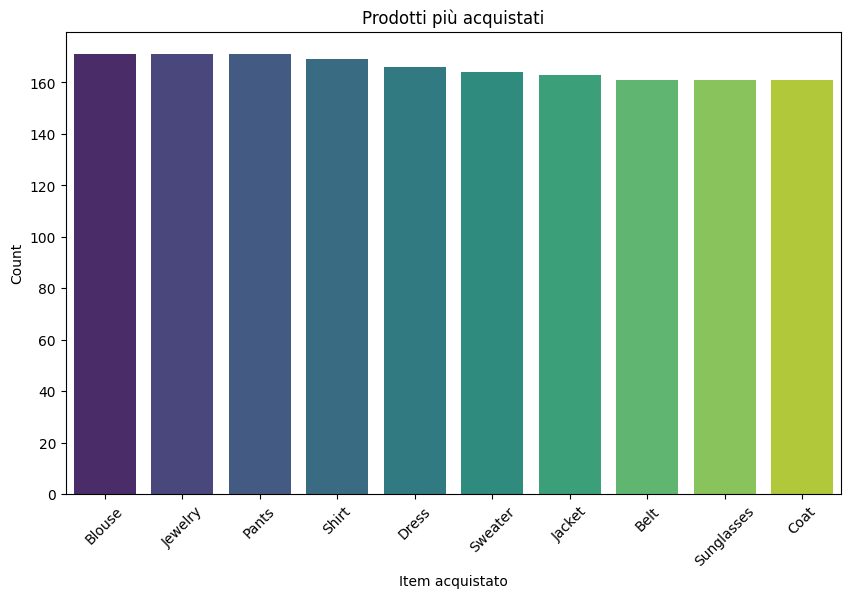

In [29]:
# Calcolo dei prodotti più popolari
item_counts = df['Item Purchased'].value_counts().head(10)

# Visualizza i top 10 prodotti
plt.figure(figsize=(10,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette='viridis')
plt.title('Prodotti più acquistati')
plt.xlabel('Item acquistato')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_5720/989046668.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


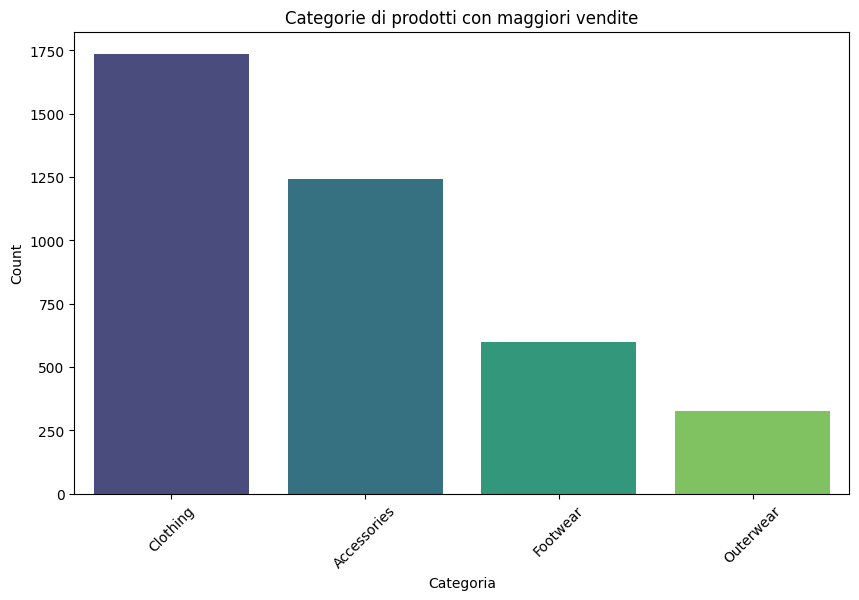

In [31]:
# Calcolo delle vendite per ciascuna categoria
category_counts = df['Category'].value_counts().head(10)

# Visualizza le top 10 categorie
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Categorie di prodotti con maggiori vendite')
plt.xlabel('Categoria')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


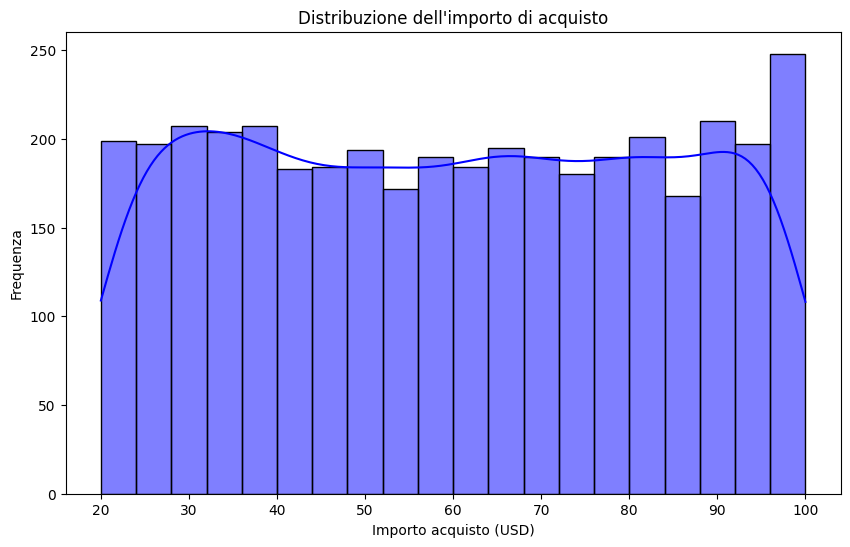

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Istogramma
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], kde=True, bins=20, color='blue')
plt.title("Distribuzione dell'importo di acquisto")
plt.xlabel("Importo acquisto (USD)")
plt.ylabel("Frequenza")
plt.show()


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_5720/2199576288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Purchase Amount (USD)', palette='viridis')


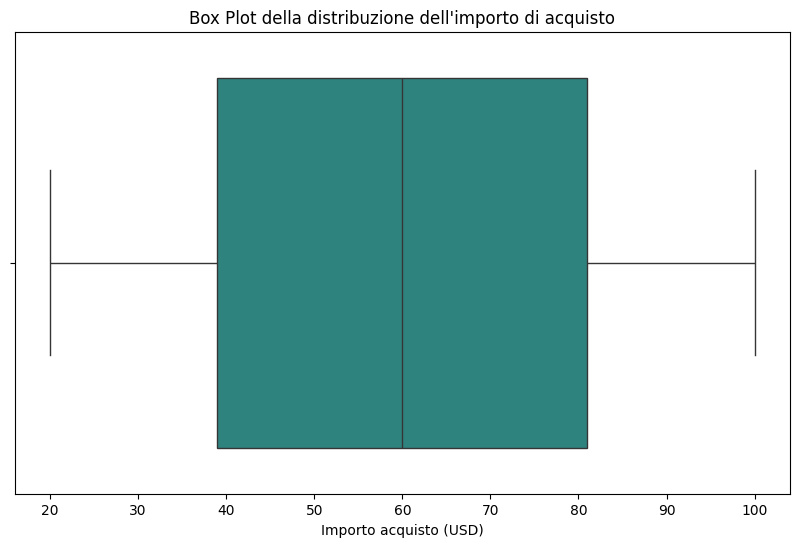

In [36]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Purchase Amount (USD)', palette='viridis')
plt.title("Box Plot della distribuzione dell'importo di acquisto")
plt.xlabel("Importo acquisto (USD)")
plt.show()


In [37]:
# Calcolo della media e deviazione standard
mean_purchase = df['Purchase Amount (USD)'].mean()
std_purchase = df['Purchase Amount (USD)'].std()

print(f"Media: {mean_purchase:.2f} USD")
print(f"Deviazione Standard: {std_purchase:.2f} USD")


Media: 59.76 USD
Deviazione Standard: 23.69 USD


In [39]:
top_products = df['Item Purchased'].value_counts().head(10)
print("Prodotti più acquistati:\n", top_products)

top_categories = df['Category'].value_counts().head(5)
print("Categorie più popolari:\n", top_categories)


Prodotti più acquistati:
 Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Name: count, dtype: int64
Categorie più popolari:
 Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


/var/folders/k3/wsr70bln3hq2nzxt3_19lhs00000gn/T/ipykernel_5720/2815576753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Season', palette='coolwarm')


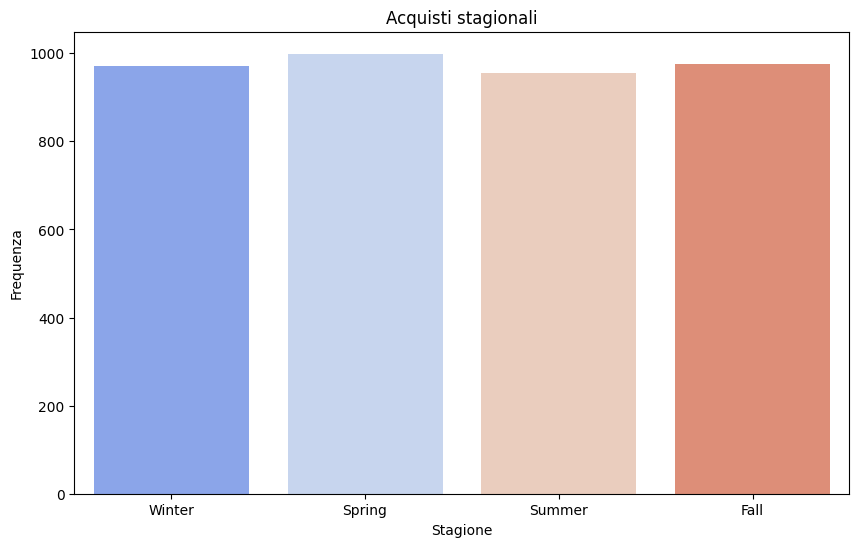

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season', palette='coolwarm')
plt.title("Acquisti stagionali")
plt.xlabel("Stagione")
plt.ylabel("Frequenza")
plt.show()


In [42]:
q1 = df['Purchase Amount (USD)'].quantile(0.25)
median = df['Purchase Amount (USD)'].median()
q3 = df['Purchase Amount (USD)'].quantile(0.75)

print(f"1° Quartile: {q1:.2f} USD, Mediana: {median:.2f} USD, 3° Quartile: {q3:.2f} USD")


1° Quartile: 39.00 USD, Mediana: 60.00 USD, 3° Quartile: 81.00 USD


In [44]:
import pandas as pd

# Supponiamo che il DataFrame si chiami 'shopping_trends'
# Raggruppiamo per 'Discount Applied' e calcoliamo la media della spesa, e il numero di clienti
elasticity_df = df.groupby('Discount Applied').agg(
    avg_spent=('Purchase Amount (USD)', 'mean'),
    num_customers=('Customer ID', 'nunique')
).reset_index()

print(elasticity_df)


  Discount Applied  avg_spent  num_customers
0               No  60.130454           2223
1              Yes  59.279070           1677


In [45]:
# Raggruppiamo per 'Customer ID' e calcoliamo le metriche di RFM (Recency, Frequency, Monetary)
rfm_df = df.groupby('Customer ID').agg(
    recency=('Purchase Amount (USD)', 'max'),
    frequency=('Purchase Amount (USD)', 'count'),
    monetary=('Purchase Amount (USD)', 'sum')
).reset_index()

print(rfm_df)


      Customer ID  recency  frequency  monetary
0               1       53          1        53
1               2       64          1        64
2               3       73          1        73
3               4       90          1        90
4               5       49          1        49
...           ...      ...        ...       ...
3895         3896       28          1        28
3896         3897       49          1        49
3897         3898       33          1        33
3898         3899       77          1        77
3899         3900       81          1        81

[3900 rows x 4 columns]


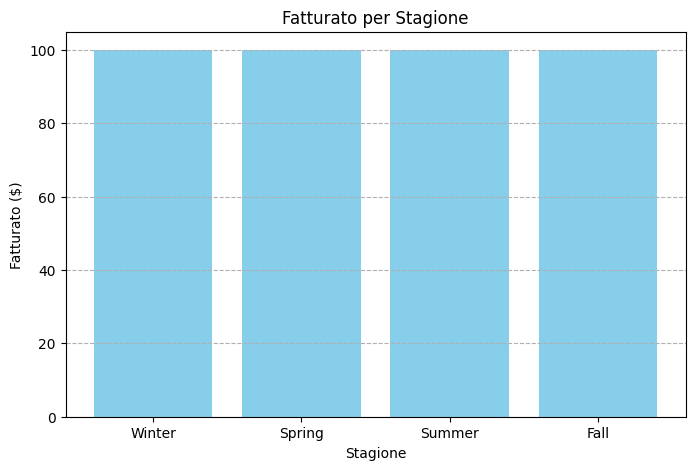

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che 'df_seasonal_revenue' contenga i dati estratti dalla query SQL
# df_seasonal_revenue = pd.read_sql('QUERY SQL', connection)

# Creiamo un grafico a barre per visualizzare il fatturato per stagione
plt.figure(figsize=(8, 5))
plt.bar(df['Season'], df['Purchase Amount (USD)'], color='skyblue')
plt.title('Fatturato per Stagione')
plt.xlabel('Stagione')
plt.ylabel('Fatturato ($)')
plt.grid(axis='y', linestyle='--')
plt.show()
